# 📌 Post-College Salary Prediction: Data Analysis & Machine Learning
**Author:** Kersha Broussard  
**Repository:** https://github.com/kersha0530/applied-ml-kersha 
**Dataset:** Post-College Salaries (Kaggle)  
**Dataset Link:** [Kaggle - Post-College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)  

---

## 📌 **Dataset Overview**
This dataset contains information about **college majors** and their impact on salaries. It includes the following key features:

- **Rank**: Position of the major in salary rankings  
- **Major**: The field of study  
- **Degree Type**: Type of degree (e.g., Bachelor's)  
- **Early Career Pay**: Median salary for early-career graduates  
- **Mid-Career Pay**: Median salary for mid-career graduates  
- **% High Meaning**: Percentage of people in this field who feel their job is meaningful  

---

## 📌 **Project Goal**
🔹 **Objective:** Given a student's **Major, Degree Type, and Early Career Pay**, we aim to **predict their Mid-Career Pay** using **Machine Learning techniques**.  

🔹 **Techniques Used:**
- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering (One-Hot Encoding)
- **Linear Regression & Random Forest Models**
- Model Evaluation & Performance Metrics

---

## 🛠 **Tools & Libraries Used**
- **Python** 🐍
- **Pandas** (Data Handling)
- **NumPy** (Numerical Computing)
- **Matplotlib & Seaborn** (Data Visualization)
- **Scikit-Learn** (Machine Learning)

---

## 📌 **Notebook Structure**
🔹 **1. Load & Inspect Data**  
🔹 **2. Data Cleaning & Preprocessing**  
🔹 **3. Exploratory Data Analysis (EDA)**  
🔹 **4. Machine Learning Model: Predict Mid-Career Pay**  
🔹 **5. Model Evaluation & Interpretation**  
🔹 **6. Conclusion & Next Steps**  

---



### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Enable inline visualization
%matplotlib inline


### Load CSV File

In [2]:
csv_path = r"C:\Users\kbrou\Downloads\post_college_salaries\final-post-college-salaries.csv"

df = pd.read_csv(csv_path)

# Display first few rows
df.head()


,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,"$98,100","$212,100",60%
1,2,Operations Research & Industrial Engineering,Bachelors,"$101,200","$202,600",21%
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,"$128,500","$192,300",45%
3,4,Interaction Design,Bachelors,"$77,400","$178,800",55%
4,5,Building Science,Bachelors,"$71,100","$172,400",46%


### Clean and Process the Data

In [3]:
import pandas as pd
import numpy as np

# 🔹 Load dataset FIRST before data cleaning
csv_path = r"C:\Users\kbrou\Downloads\post_college_salaries\final-post-college-salaries.csv"

try:
    df = pd.read_csv(csv_path)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: File not found at {csv_path}")
    df = None  # Prevent errors if the dataset is missing

# Proceed only if df is successfully loaded
if df is not None:
    print("📌 First 5 rows of the dataset:")
    display(df.head())

    # 🔹 Convert salary columns to numeric (remove "$" and ",")
    if "Early Career Pay" in df.columns and "Mid-Career Pay" in df.columns:
        df["Early Career Pay"] = df["Early Career Pay"].replace('[\$,]', '', regex=True).astype(float)
        df["Mid-Career Pay"] = df["Mid-Career Pay"].replace('[\$,]', '', regex=True).astype(float)

    # 🔹 Convert "% High Meaning" column to numeric (remove '%' and convert to float)
    if "% High Meaning" in df.columns:
        df["% High Meaning"] = df["% High Meaning"].str.replace('%', '', regex=True)
        df["% High Meaning"] = pd.to_numeric(df["% High Meaning"], errors="coerce")  # Converts invalid values to NaN

    # 🔹 Drop missing values after conversion
    df = df.dropna()

    # 🔹 Ensure only numeric data remains for correlation and ML
    df_numeric = df.select_dtypes(include=[np.number])

    # 🔹 Convert categorical variables using One-Hot Encoding
    if "Major" in df.columns and "Degree Type" in df.columns:
        df_encoded = pd.get_dummies(df, columns=["Major", "Degree Type"], drop_first=True)
    else:
        df_encoded = df.copy()  # If no categorical columns exist, keep dataframe as is

    print("\n✅ Data Cleaning Completed. Shape of dataset:", df_encoded.shape)
    print(df_encoded.info())  # Check final data types
else:
    print("❌ Data loading failed. Fix file path and retry.")


✅ Dataset loaded successfully!
📌 First 5 rows of the dataset:


,Rank,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
0,1,Petroleum Engineering,Bachelors,"$98,100","$212,100",60%
1,2,Operations Research & Industrial Engineering,Bachelors,"$101,200","$202,600",21%
2,3,Electrical Engineering & Computer Science (EECS),Bachelors,"$128,500","$192,300",45%
3,4,Interaction Design,Bachelors,"$77,400","$178,800",55%
4,5,Building Science,Bachelors,"$71,100","$172,400",46%



✅ Data Cleaning Completed. Shape of dataset: (708, 711)
<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 762
Columns: 711 entries, Rank to Major_Zoology
dtypes: bool(707), float64(3), int64(1)
memory usage: 516.5 KB
None


### Heatmap

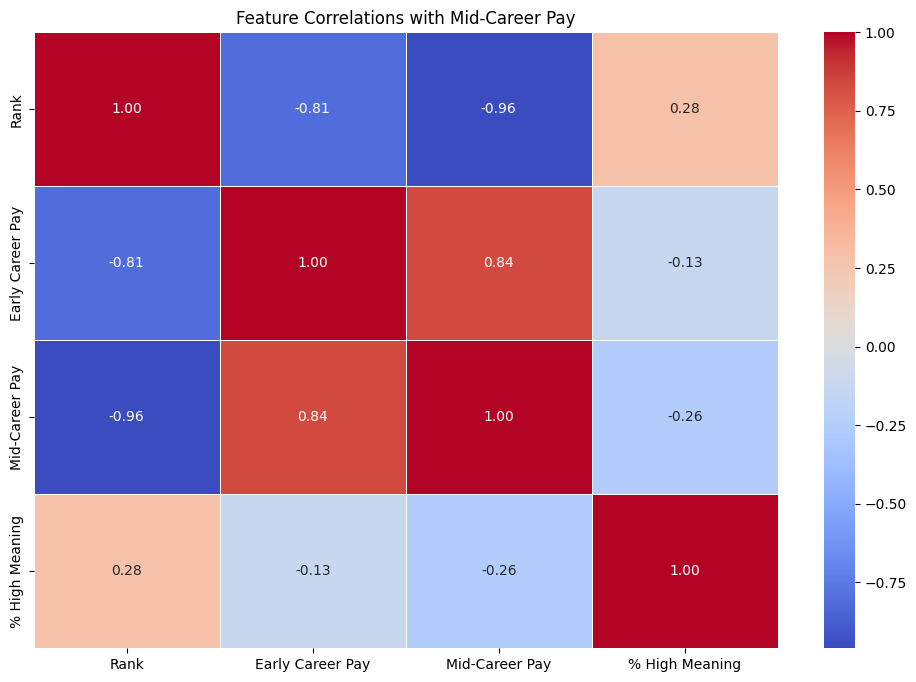

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
df_numeric = df.select_dtypes(include=[np.number])

# 🔹 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations with Mid-Career Pay")
plt.show()

### Scatterplot

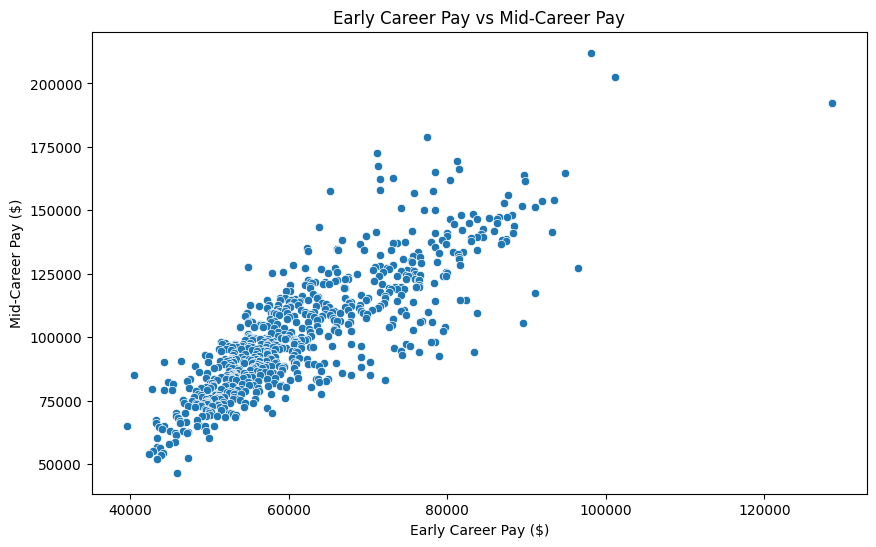

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Early Career Pay"], y=df["Mid-Career Pay"])
plt.title("Early Career Pay vs Mid-Career Pay")
plt.xlabel("Early Career Pay ($)")
plt.ylabel("Mid-Career Pay ($)")
plt.show()


### Boxplot

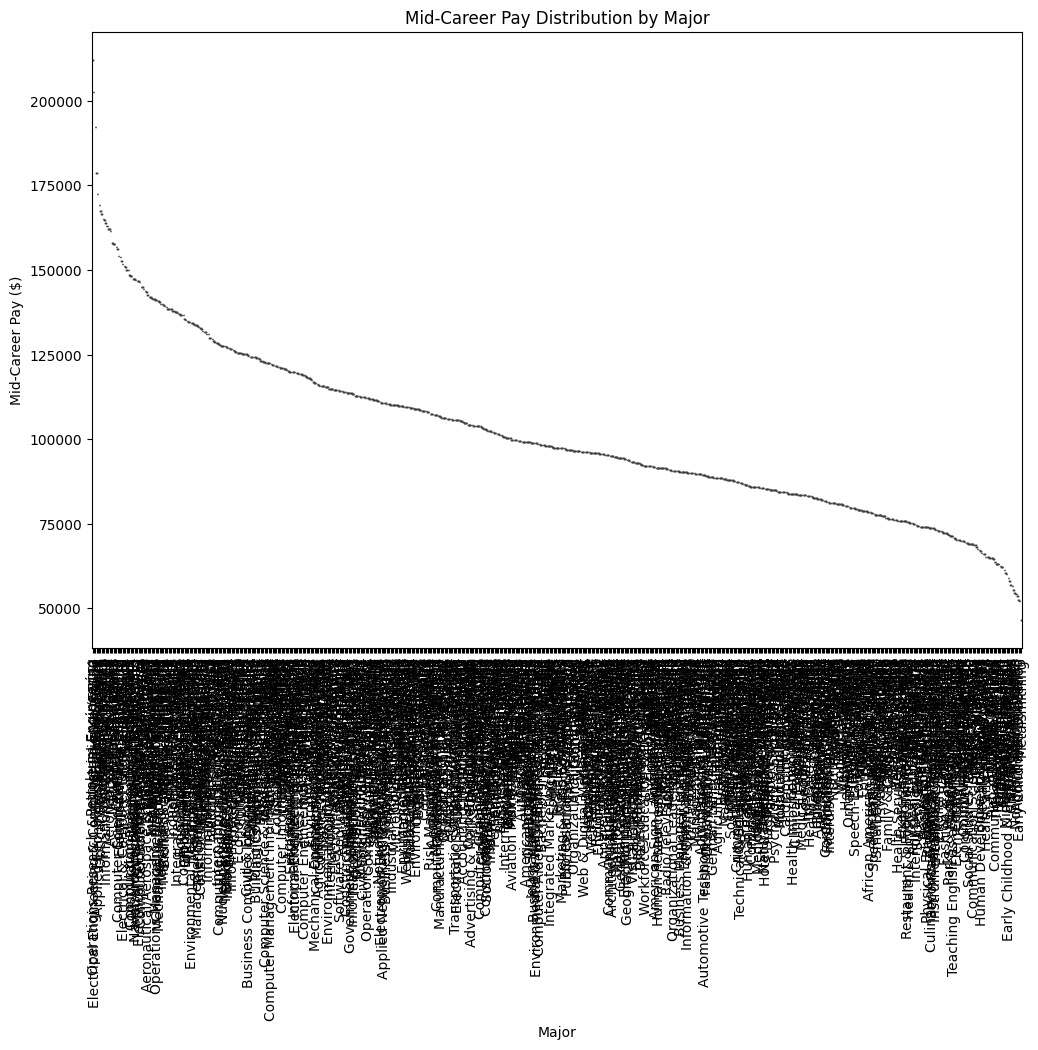

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=df["Mid-Career Pay"], x=df["Major"])
plt.xticks(rotation=90)
plt.title("Mid-Career Pay Distribution by Major")
plt.xlabel("Major")
plt.ylabel("Mid-Career Pay ($)")
plt.show()


### Train Machine Learning Model

In [8]:
df_encoded = pd.get_dummies(df, columns=["Major", "Degree Type"], drop_first=True)


In [9]:
# Define Features (X) and Target (y)
X = df_encoded.drop(columns=["Mid-Career Pay"])
y = df_encoded["Mid-Career Pay"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
print(f"Linear Regression R²: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


Linear Regression R²: 0.95
Mean Squared Error: 30227082.54


In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest Model
print(f"Random Forest R²: {r2_score(y_test, rf_pred):.2f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_pred):.2f}")


Random Forest R²: 1.00
Random Forest MSE: 72307.23
